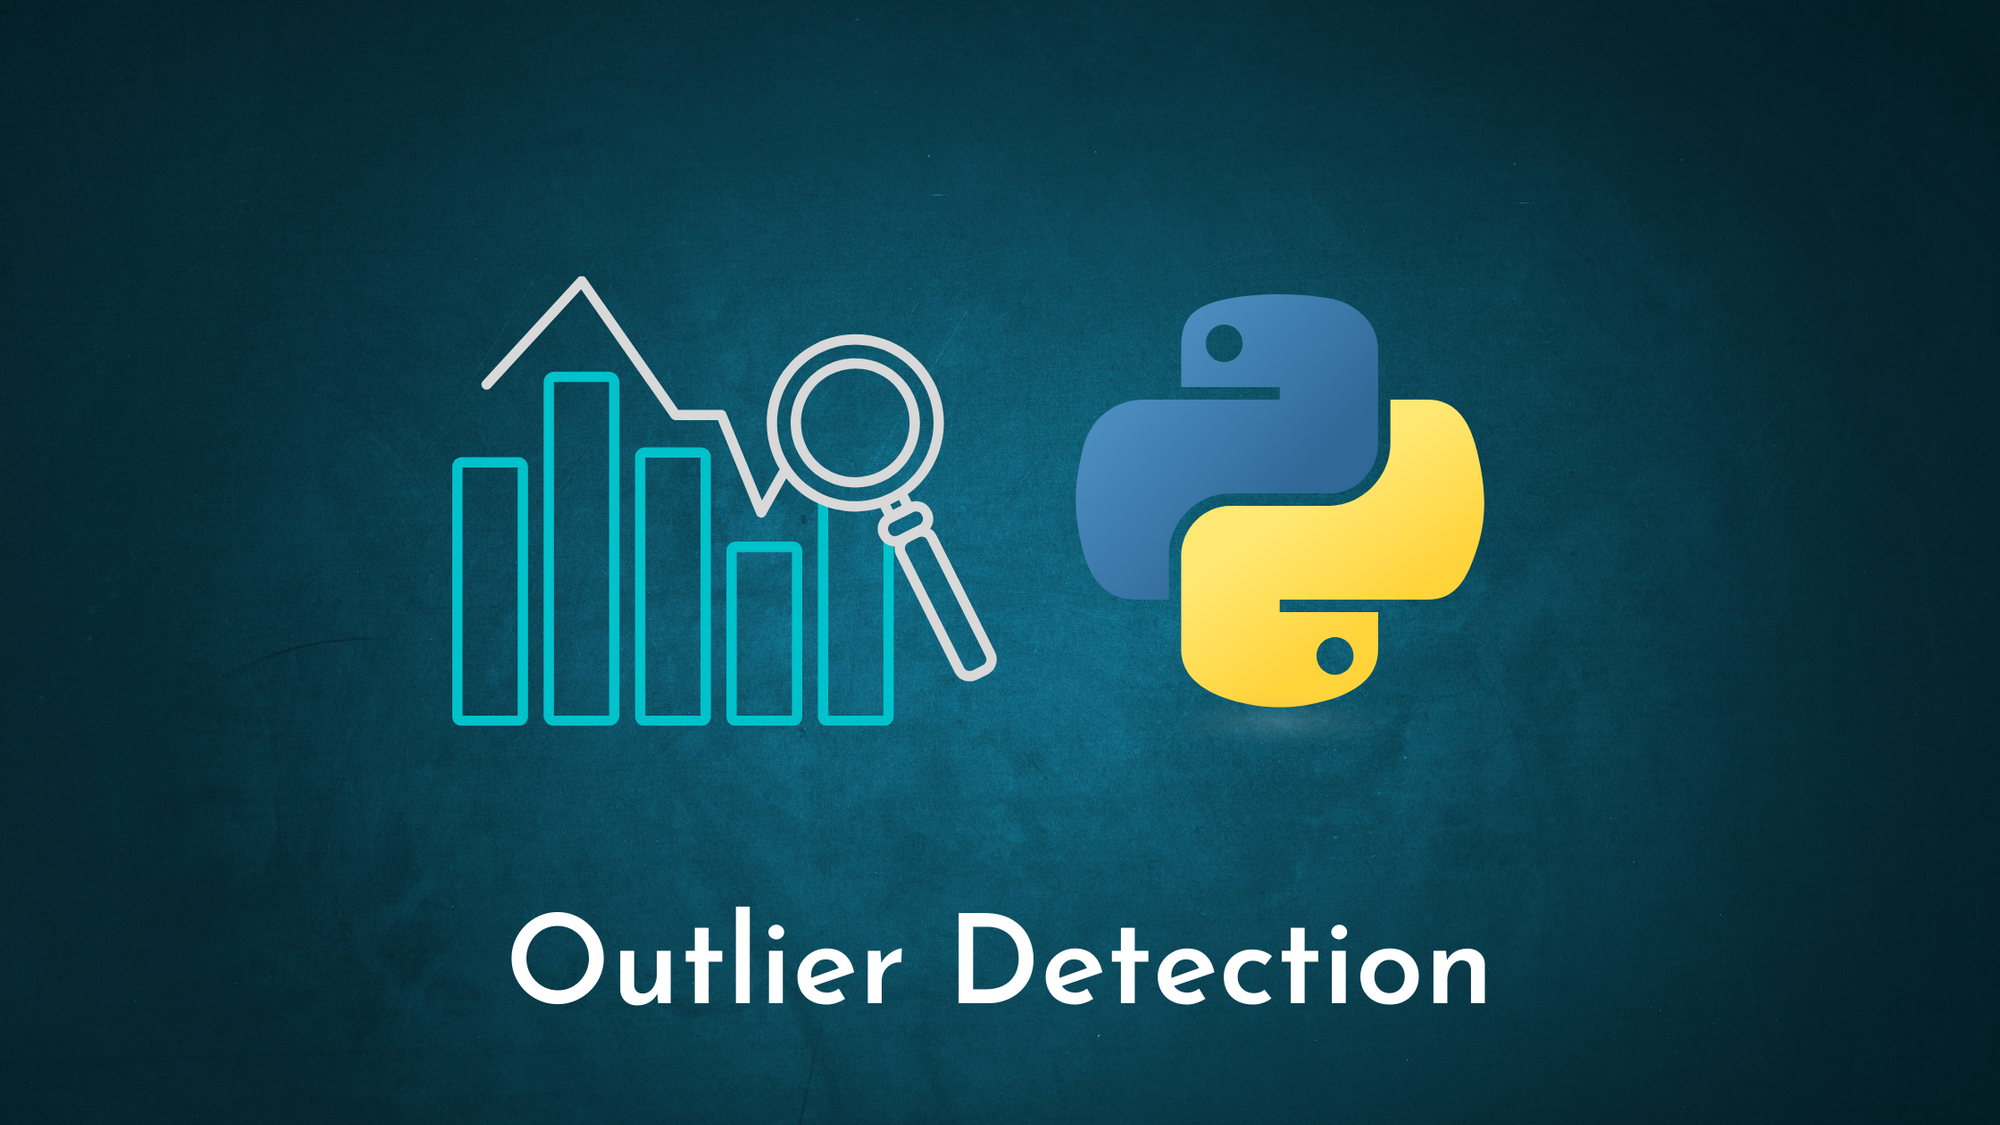

<div style="text-align: center; background-color: #856ff8; padding: 10px;">
    <h2 style="font-weight: bold;">OUTLINE</h2>
</div>

- Importing Various Modules
- Loading Dataset
- Data Wrangling
    - Computing the size of DataFrame
    - Z-Score
    - Interquartile Range Method (IQR)
    - Compare Skewness
- Save Dataframe to CSV File

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">IMPORTING VARIOUS MODULES</h2>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">LOADING DATASET</h2>
</div>

In [2]:
preprocessed_apps_data = pd.read_csv(r'file3_googleplaystore_preprocessed.csv')

In [3]:
# Print top 5 rows in the dataframe.
preprocessed_apps_data.head().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

In [4]:
# Print bottom 5 rows in the dataframe.
preprocessed_apps_data.tail().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">DATA WRANGLING</h2>
</div>

## 1] COMPUTING SIZE OF DATASET 

In [5]:
# Print the shape of the DataFrame
print("The shape of data frame:", preprocessed_apps_data.shape)
# Print the length (number of rows) of the DataFrame
print("Number of Rows in the dataframe:", len(preprocessed_apps_data))
# Print the number of columns in the DataFrame
print("Number of Columns in the dataframe:", len(preprocessed_apps_data.columns))

The shape of data frame: (10840, 16)
Number of Rows in the dataframe: 10840
Number of Columns in the dataframe: 16


## 2] Z - Score

- The number of standard deviations away from the mean that a particular observation is.
- A negative Z-score means an observation is below the mean.
- While a positive Z-score means means it above the mean.
- The further away from 0 the Z-Score is, the further away from the mean your observation is.

In [6]:
num_features=[col for col in preprocessed_apps_data.columns if preprocessed_apps_data[col].dtype!='O']
num_df = preprocessed_apps_data[num_features]
num_df.head()

Rating  Reviews  Size  Installs  Price  Day  Month  Year
0     4.1      159  19.0     10000    0.0    7      1  2018
1     3.9      967  14.0    500000    0.0   15      1  2018
2     4.7    87510   8.7   5000000    0.0    1      8  2018
3     4.5   215644  25.0  50000000    0.0    8      6  2018
4     4.3      967   2.8    100000    0.0   20      6  2018

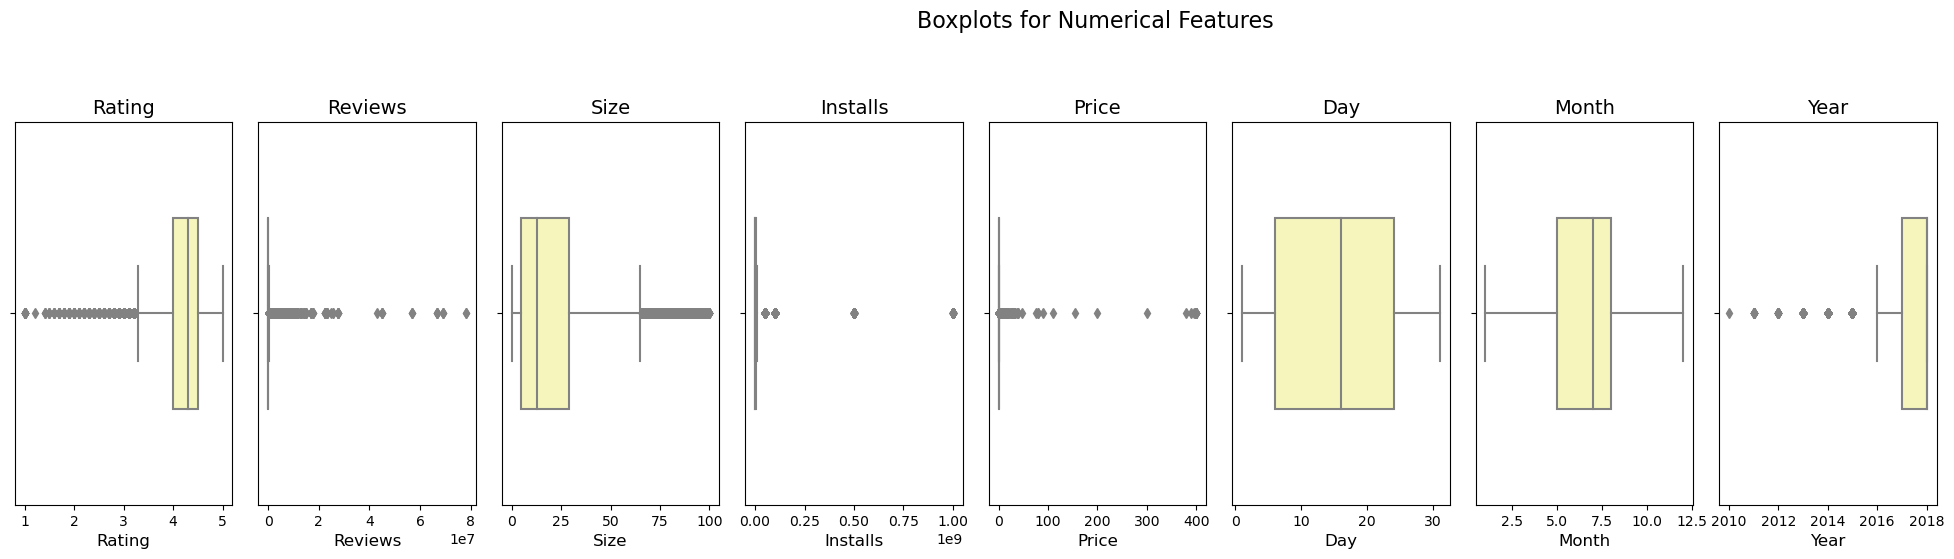

In [7]:
plt.figure(figsize=(22, 18))

# Specify the number of rows and columns in the subplot grid
num_rows = 4
num_cols = 9

# Add a common title for the entire figure
plt.suptitle('Boxplots for Numerical Features', fontsize=16, y=1.02)

for i, col in enumerate(num_df.columns):
    # Create subplots
    plt.subplot(num_rows, num_cols, i + 1)
    
    # Set a custom color palette for the boxplots
    custom_palette = sns.color_palette("Set3")
    sns.boxplot(x=num_df[col], color=custom_palette[1], width=0.5)
    
    # Adjust the boxplot appearance
    plt.xlabel(col, fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    
    # Add a title for each subplot
    plt.title(col, fontsize=14)

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

### Insights

- Except Day and month feature we have outliers in all other features

In [8]:
# Function to detect outliers
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [9]:
## function to remove outliers
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [10]:
replace_with_thresholds(num_df, num_df.columns)

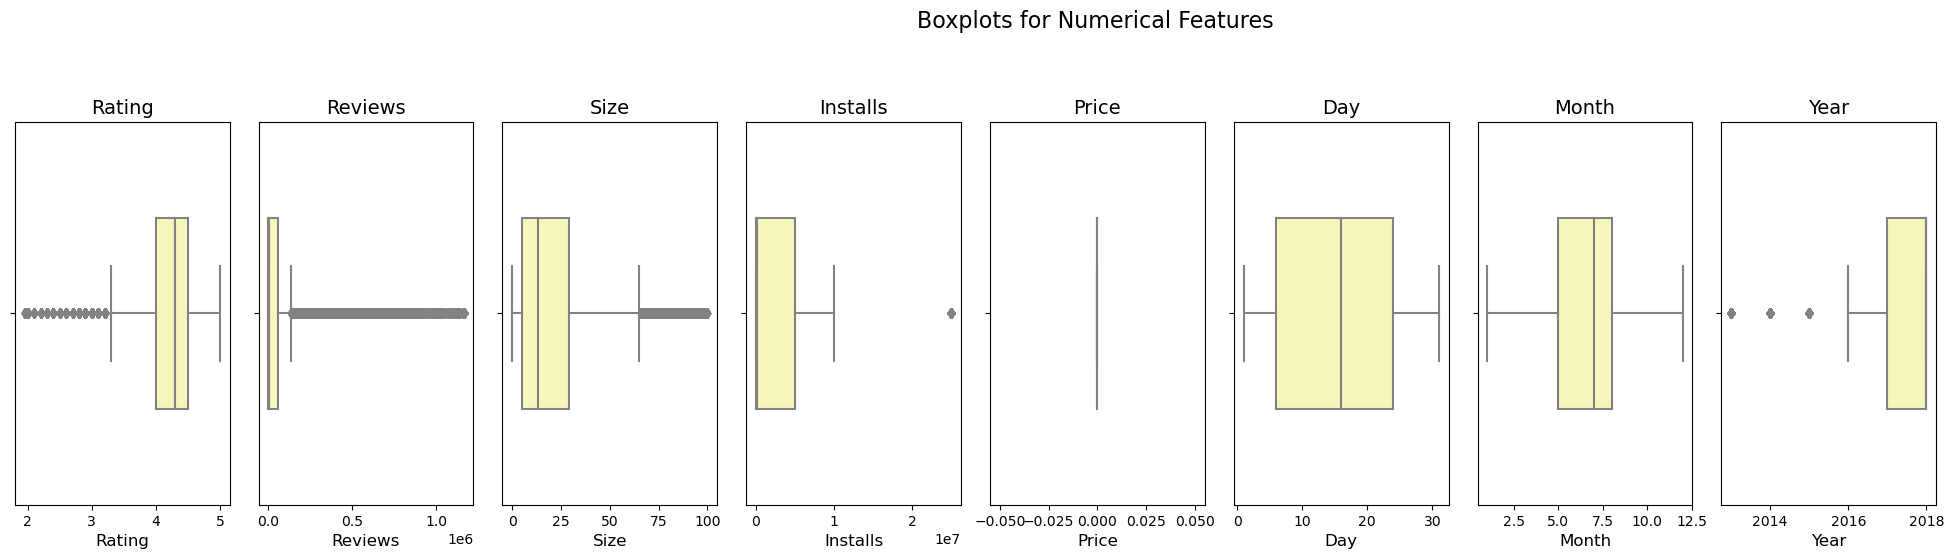

In [11]:
plt.figure(figsize=(22, 18))

# Specify the number of rows and columns in the subplot grid
num_rows = 4
num_cols = 9

# Add a common title for the entire figure
plt.suptitle('Boxplots for Numerical Features', fontsize=16, y=1.02)

for i, col in enumerate(num_df.columns):
    # Create subplots
    plt.subplot(num_rows, num_cols, i + 1)
    
    # Set a custom color palette for the boxplots
    custom_palette = sns.color_palette("Set3")
    sns.boxplot(x=num_df[col], color=custom_palette[1], width=0.5)
    
    # Adjust the boxplot appearance
    plt.xlabel(col, fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    
    # Add a title for each subplot
    plt.title(col, fontsize=14)

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

### Insights

- As we can see from above boxplots outliers are not removed properly

## 3] INTERQUARTILE RANGE METHOD ( IQR ) 

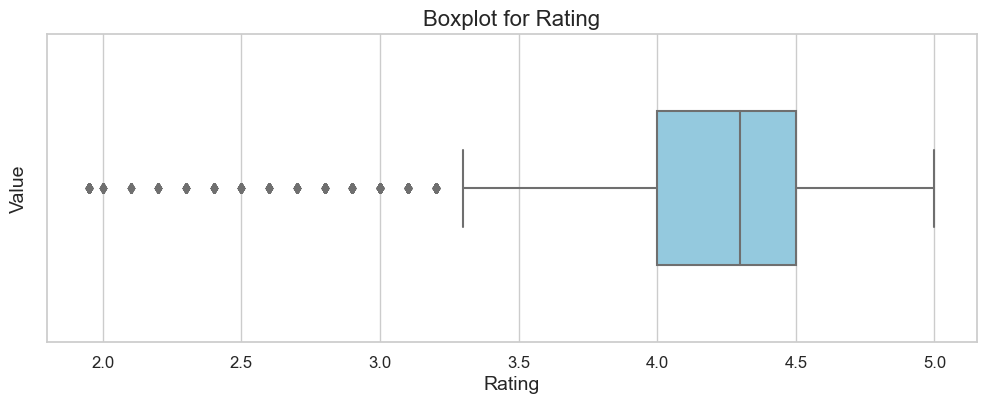

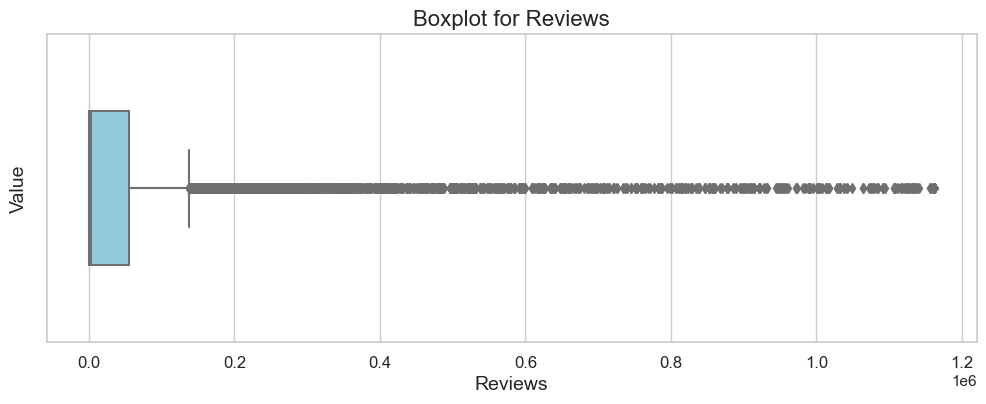

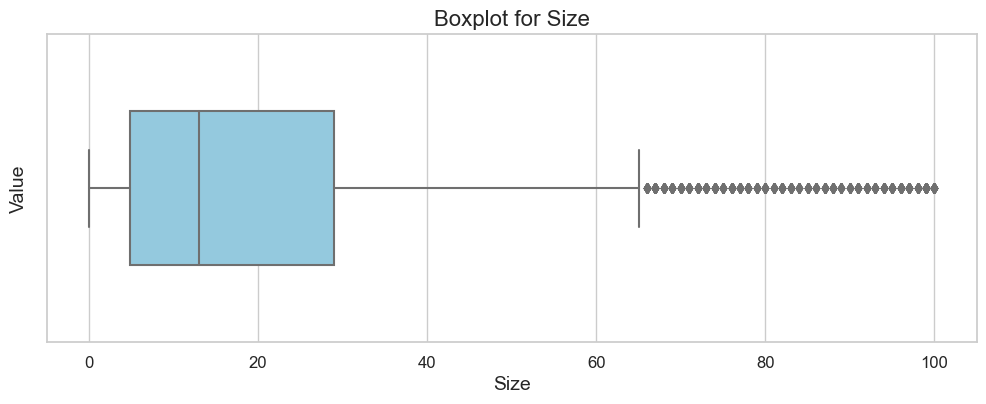

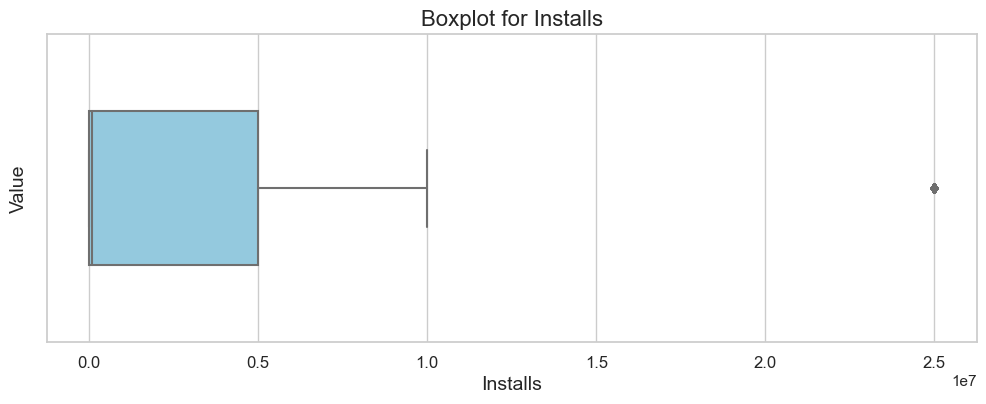

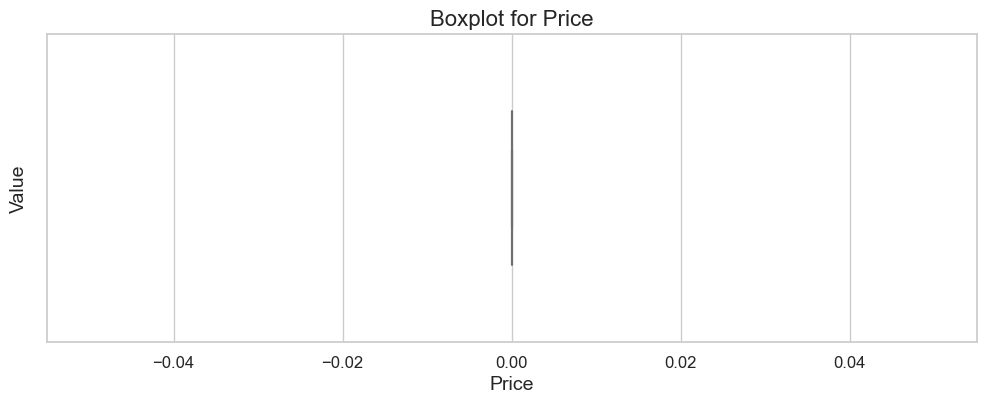

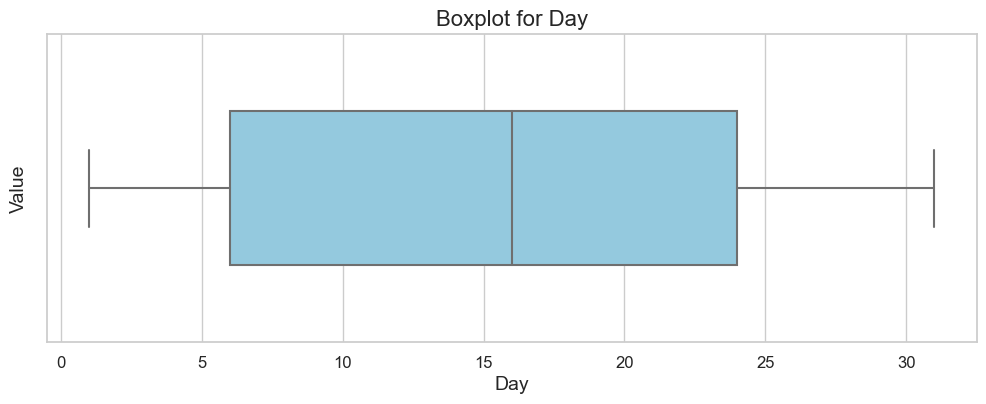

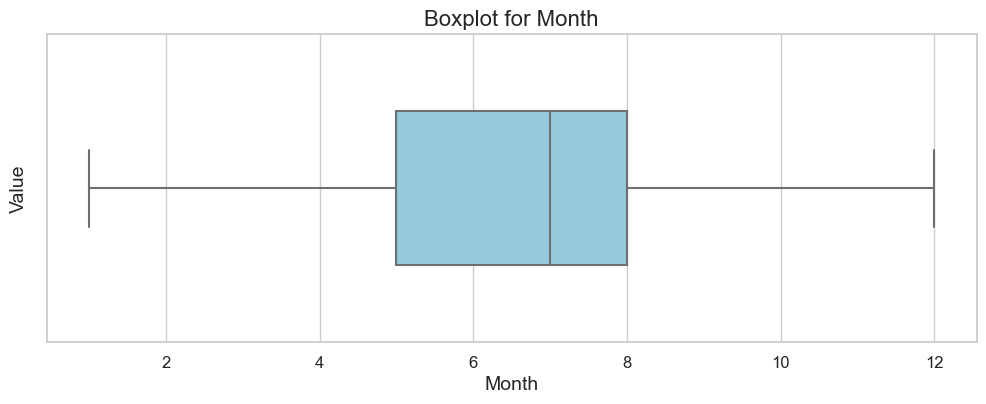

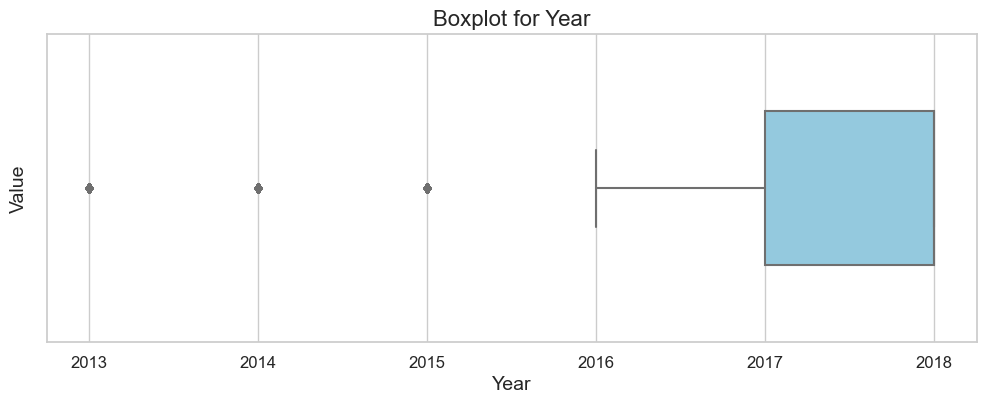

In [12]:
# Set a common style for all plots
sns.set(style="whitegrid")

for col in num_df.columns:
    # Create a figure with a specific size for each boxplot
    plt.figure(figsize=(12, 4))
    
    # Create a boxplot with Seaborn
    sns.boxplot(data=num_df, x=col, color='skyblue', width=0.5)
    
    # Set title, labels, and formatting
    plt.title(f'Boxplot for {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Value', fontsize=14)
    
    # Adjust the tick label size for better readability
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    # Display the plot
    plt.show()

In [13]:
preprocessed_apps_data_1 = preprocessed_apps_data.copy()
def remove_outliers_IQR(col):
    # Finding the IQR
    percentile25 = preprocessed_apps_data_1[col].quantile(0.25)
    percentile75 = preprocessed_apps_data_1[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    preprocessed_apps_data_1[col] = np.where(preprocessed_apps_data_1[col]>upper_limit, upper_limit, np.where(preprocessed_apps_data_1[col]<lower_limit,lower_limit,preprocessed_apps_data_1[col]))
    return preprocessed_apps_data_1[preprocessed_apps_data_1[col] > upper_limit]

In [14]:
def create_comparison_plot(preprocessed_apps_data, preprocessed_apps_data_1, column, name1="DataFrame 1", name2="DataFrame 2"):
    # Set a common style for all plots
    sns.set(style="whitegrid")

    # Create a figure with a specific size
    fig, axes = plt.subplots(2, 2, figsize=(16, 8))

    # Calculate the common x-axis limits
    x_min = min(preprocessed_apps_data[column].min(), preprocessed_apps_data_1[column].min())
    x_max = max(preprocessed_apps_data[column].max(), preprocessed_apps_data_1[column].max())

    # Plot 1: Distribution Plot for preprocessed_apps_data
    sns.distplot(preprocessed_apps_data[column], ax=axes[0, 0], color='skyblue')
    axes[0, 0].set_title(f'Distribution Plot for {column} ({name1})', fontsize=14)
    axes[0, 0].set_xlabel('')
    axes[0, 0].set_ylabel('Density', fontsize=12)
    axes[0, 0].set_xlim(x_min, x_max)  # Set common x-axis limits

    # Plot 2: Box Plot for preprocessed_apps_data
    sns.boxplot(data=preprocessed_apps_data, x=column, ax=axes[0, 1], color='skyblue', width=0.5)
    axes[0, 1].set_title(f'Box Plot for {column} ({name1})', fontsize=14)
    axes[0, 1].set_xlabel('')
    axes[0, 1].set_ylabel('')
    axes[0, 1].set_xlim(x_min, x_max)  # Set common x-axis limits

    # Plot 3: Distribution Plot for df1
    sns.distplot(preprocessed_apps_data_1[column], ax=axes[1, 0], color='lightcoral')
    axes[1, 0].set_title(f'Distribution Plot for {column} ({name2})', fontsize=14)
    axes[1, 0].set_xlabel(column, fontsize=12)
    axes[1, 0].set_ylabel('Density', fontsize=12)
    axes[1, 0].set_xlim(x_min, x_max)  # Set common x-axis limits

    # Plot 4: Box Plot for df1
    sns.boxplot(data=preprocessed_apps_data_1, x=column, ax=axes[1, 1], color='lightcoral', width=0.5)
    axes[1, 1].set_title(f'Box Plot for {column} ({name2})', fontsize=14)
    axes[1, 1].set_xlabel(column, fontsize=12)
    axes[1, 1].set_ylabel('')
    axes[1, 1].set_xlim(x_min, x_max)  # Set common x-axis limits

    # Adjust layout and spacing
    plt.tight_layout()

    # Show the plot
    plt.show()

In [15]:
remove_outliers_IQR('Rating')

percentile25 4.0
percentile75 4.5
Upper limit 5.25
Lower limit 3.25


Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver, Day, Month, Year]
Index: []

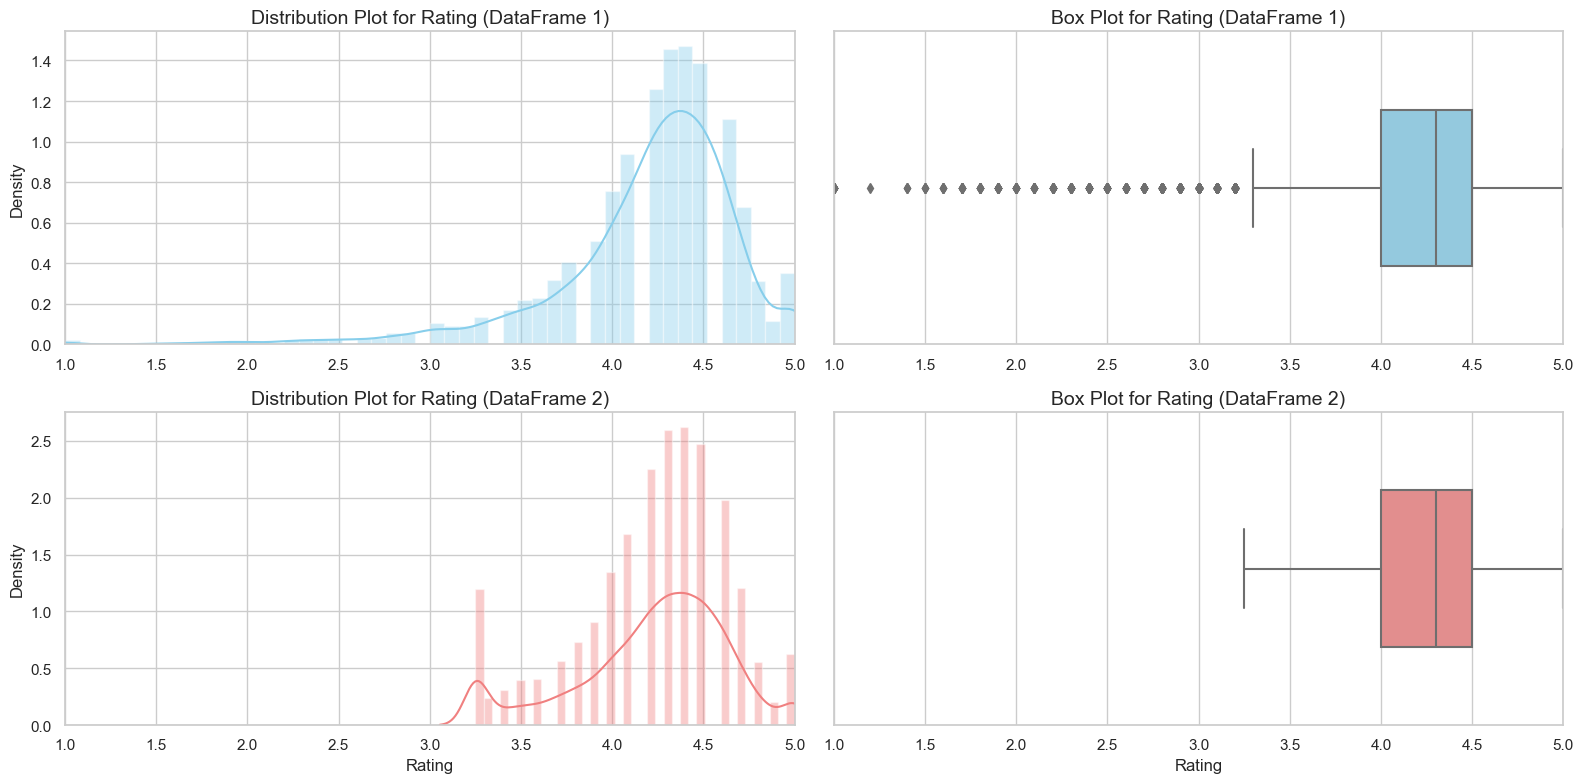

In [16]:
create_comparison_plot(preprocessed_apps_data,preprocessed_apps_data_1,"Rating")

In [17]:
remove_outliers_IQR('Size')

percentile25 4.9
percentile75 29.0
Upper limit 65.15
Lower limit -31.250000000000007


Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver, Day, Month, Year]
Index: []

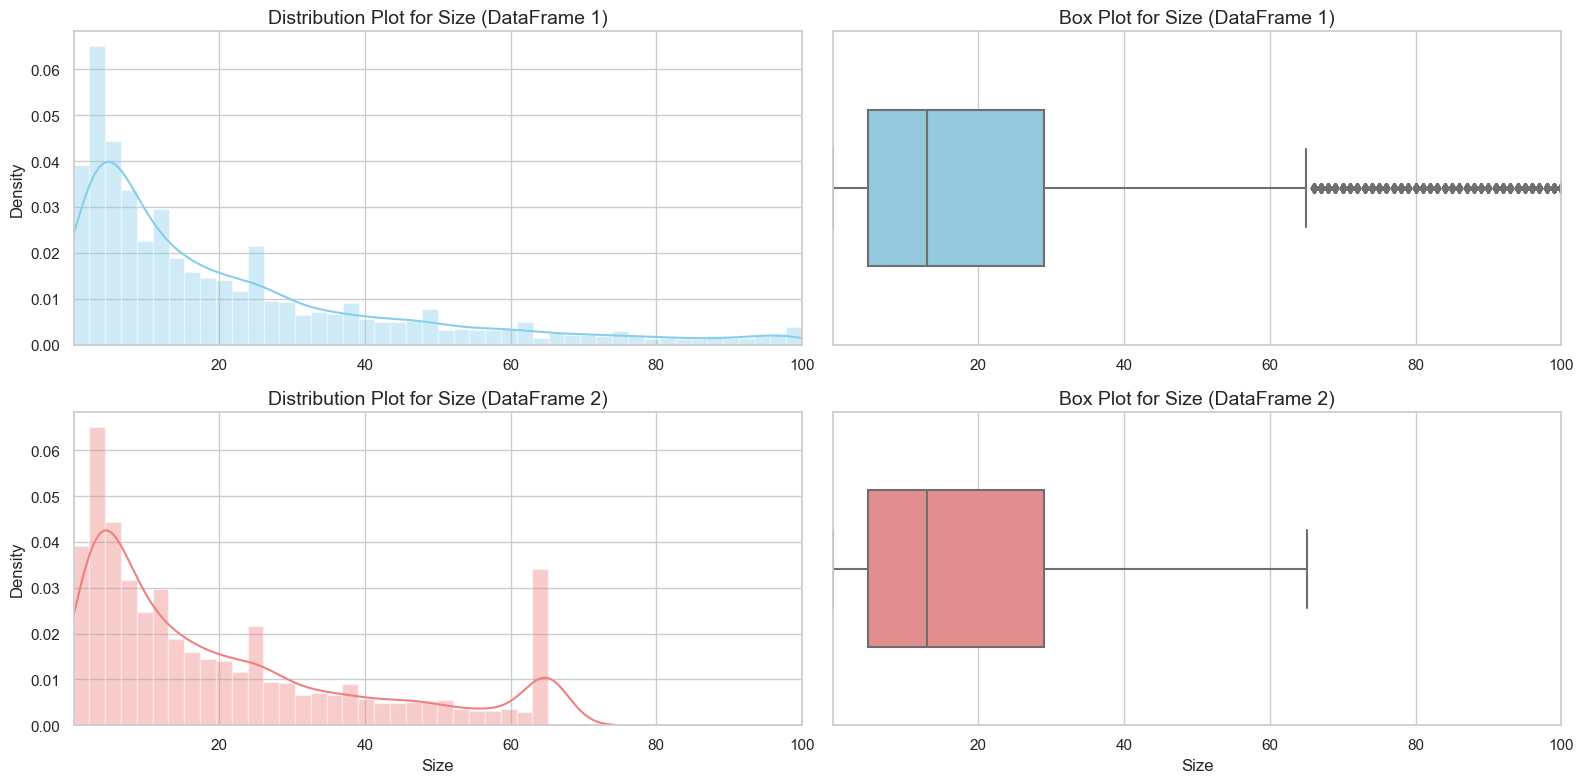

In [18]:
create_comparison_plot(preprocessed_apps_data,preprocessed_apps_data_1,"Size")

In [19]:
remove_outliers_IQR('Reviews')

percentile25 38.0
percentile75 54775.5
Upper limit 136881.75
Lower limit -82068.25


Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver, Day, Month, Year]
Index: []

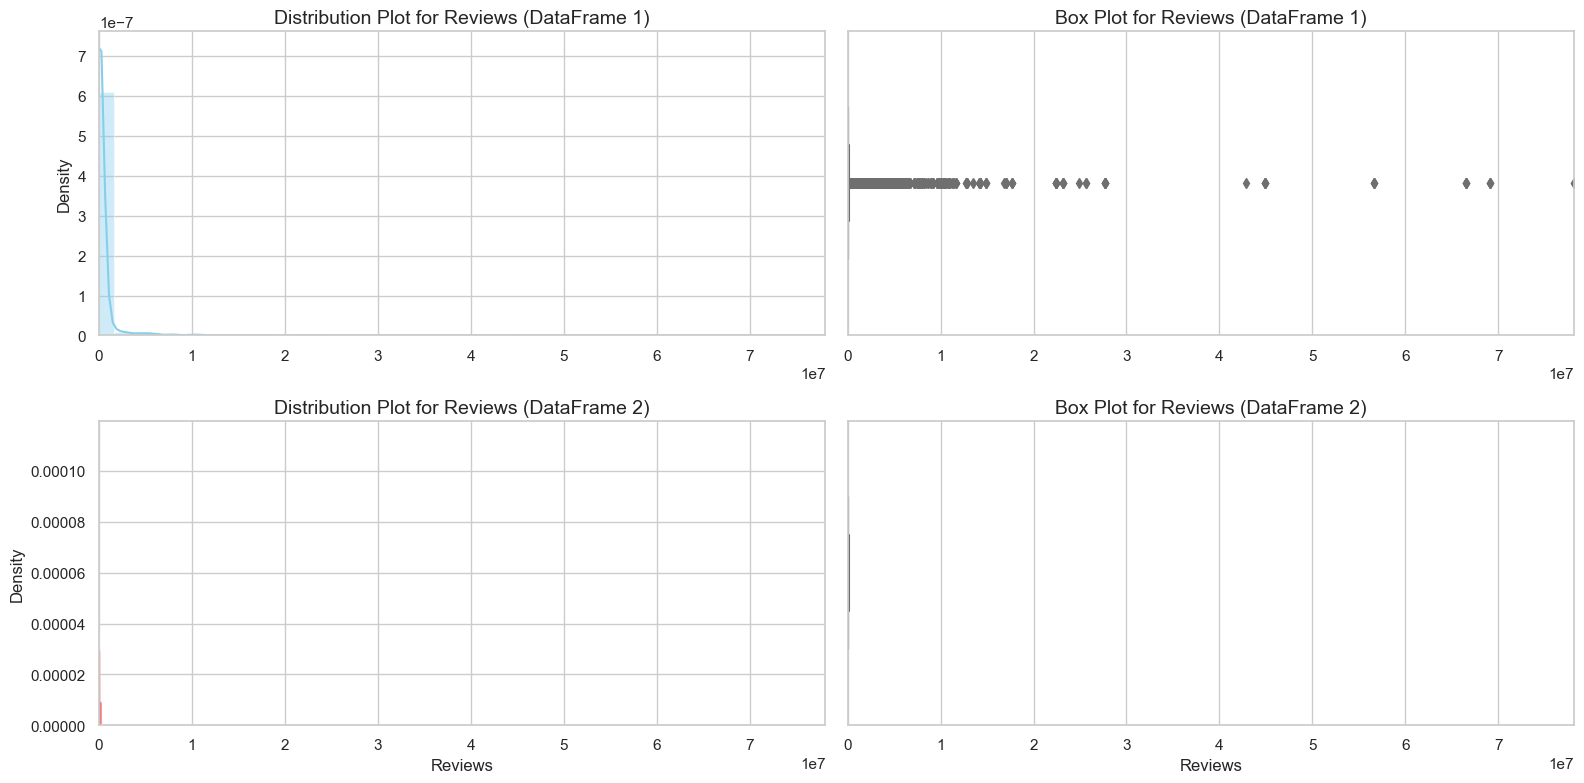

In [20]:
create_comparison_plot(preprocessed_apps_data,preprocessed_apps_data_1,"Reviews")

In [21]:
remove_outliers_IQR('Installs')

percentile25 1000.0
percentile75 5000000.0
Upper limit 12498500.0
Lower limit -7497500.0


Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver, Day, Month, Year]
Index: []

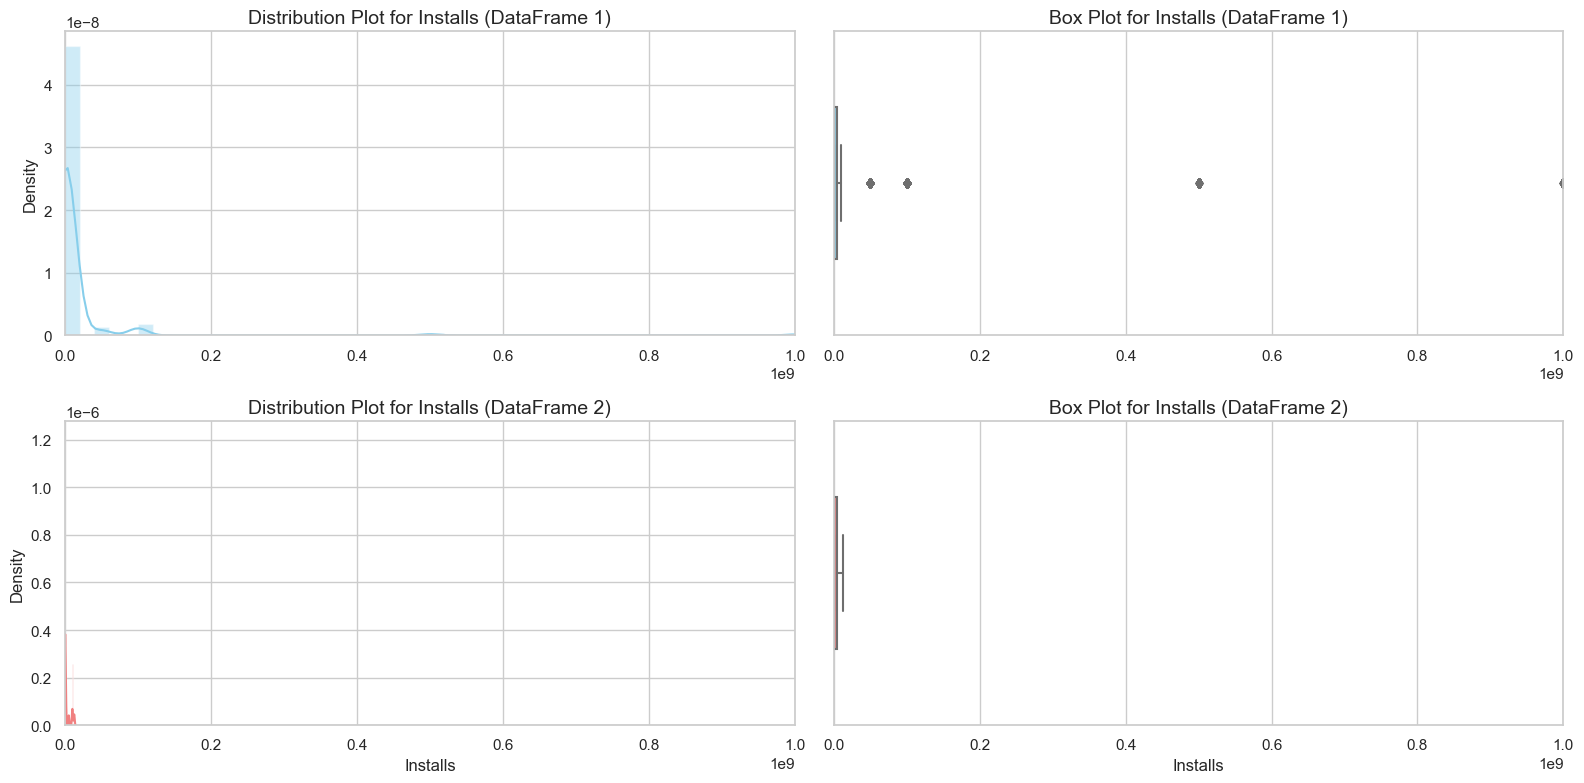

In [22]:
create_comparison_plot(preprocessed_apps_data,preprocessed_apps_data_1,"Installs")

In [23]:
remove_outliers_IQR('Year')

percentile25 2017.0
percentile75 2018.0
Upper limit 2019.5
Lower limit 2015.5


Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver, Day, Month, Year]
Index: []

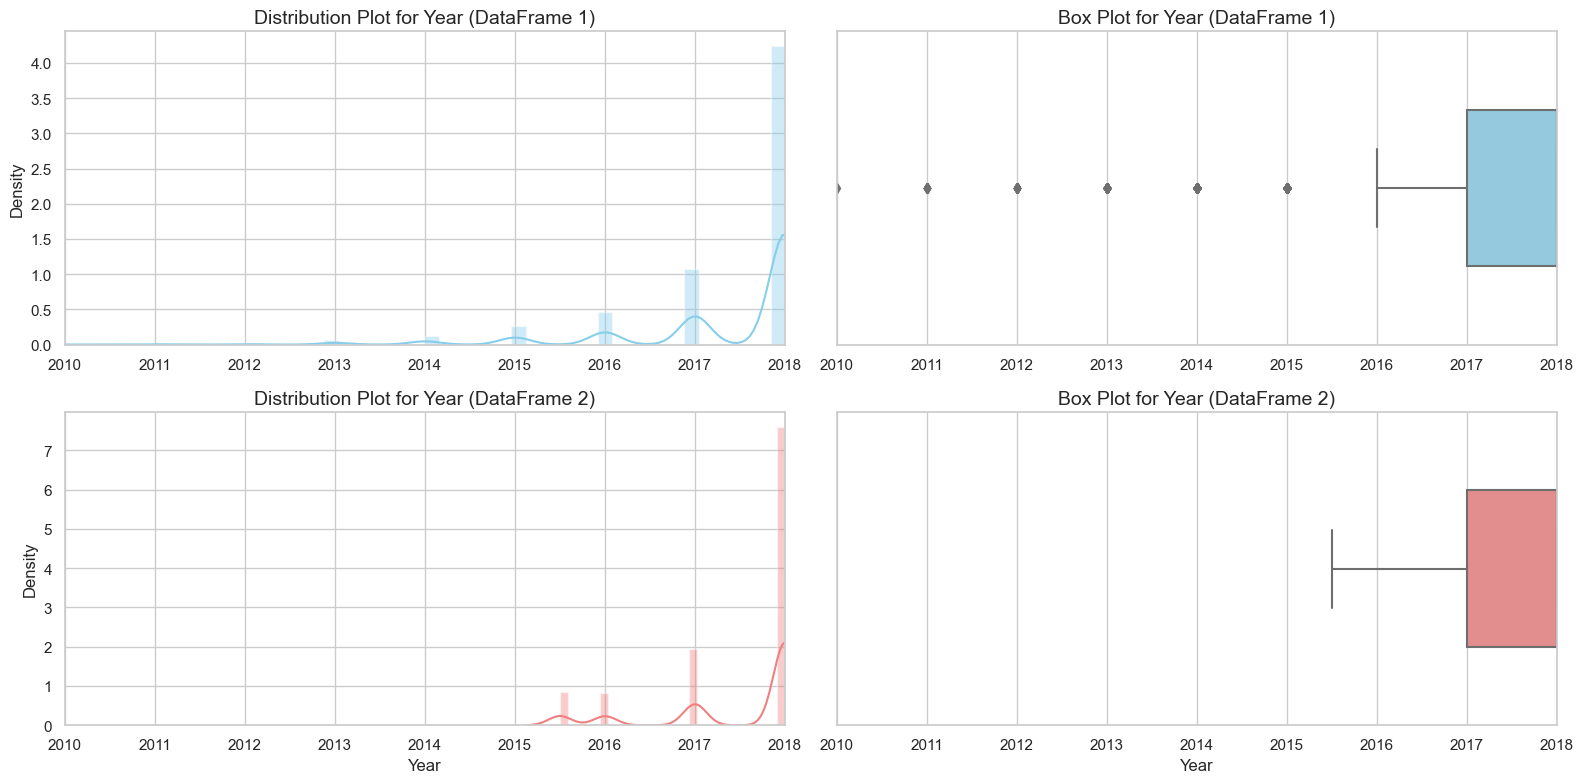

In [24]:
create_comparison_plot(preprocessed_apps_data,preprocessed_apps_data_1,"Year")

## 4] COMPARE SKEWNESS

In [25]:
preprocessed_apps_data.skew()

Rating      -1.855853
Reviews     16.449584
Size         1.564189
Installs     9.572067
Price       23.707392
Day         -0.002569
Month       -0.114442
Year        -2.288293
dtype: float64

In [26]:
preprocessed_apps_data_1.skew()

Rating      -0.689370
Reviews      1.197882
Size         1.093377
Installs     1.384312
Price       23.707392
Day         -0.002569
Month       -0.114442
Year        -1.371946
dtype: float64

### Insights

- Skewness is reduced after we have removed ouliers using IQR Method

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">SAVING DATAFRAME TO CSV FILE</h2>
</div>

In [27]:
preprocessed_apps_data_1.to_csv('file4_googleplaystore.csv',index=False)